<a href="https://colab.research.google.com/github/LeVuPhuoc/AI_final_project/blob/main/Classification_15_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import glob

import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/AI/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

# # !unzip valid_flowers.zip
# # !unzip train_flowers.zip
# # !rm -r black* calendula
# !ls


Classification_15_flowers.ipynb  train_flowers.zip  valid_flowers.zip
train_flowers			 valid_flowers


In [ ]:
def plot_history(history_fine):
  f1 = history_fine.history['accuracy']
  val_f1 = history_fine.history['val_accuracy']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='accuracy')
  plt.plot(val_f1, label='Validation accuracy')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224, 3)
N_TRAIN_EXAMPLES = 3000
N_VALID_EXAMPLES = 1000
BATCHSIZE = 8


train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
)
test_datagen = ImageDataGenerator(
    rescale=1/255,
)

training_set = train_datagen.flow_from_directory(
    directory='train_flowers/',
    target_size=IMAGE_SHAPE[:2], 
    batch_size=32, 
    class_mode='categorical',
    subset='training',
)
validation_set = train_datagen.flow_from_directory(
    directory='train_flowers/',
    target_size=IMAGE_SHAPE[:2], 
    batch_size=32, 
    class_mode='categorical',
    subset='validation',
)

test_set = test_datagen.flow_from_directory(
    directory='valid_flowers/',
    target_size=IMAGE_SHAPE[:2], 
    batch_size=32, 
    class_mode='categorical'
)

NUM_CLASSES = len(training_set.class_indices)

[I 2022-06-18 17:04:18,095] A new study created in memory with name: no-name-73e3c8a5-ca1e-4ec2-904e-16b975aa60ee


Loss=2.80234432220459, Accuracy=0.05808887630701065 


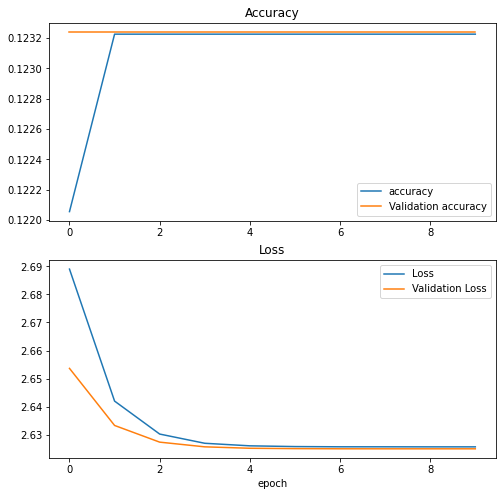

[I 2022-06-18 17:14:40,292] Trial 0 finished with value: 0.05808887630701065 and parameters: {'filters_l1': 30, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.33168911757377356, 'filters_l2': 140, 'kernel_size_l2': 3, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'linear', 'dropout_l2': 0.35150001921710317, 'filters_l3': 30, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.4237128002970709, 'n_units_l': 17, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.2714306811165551, 'learning_rate': 0.0009987084770827677, 'beta_1': 0.9181018832269043, 'beta_2': 0.9166441837844439, 'epsilon': 1.1781001223042992e-08}. Best is trial 0 with value: 0.05808887630701065.


Loss=2.277189254760742, Accuracy=0.23758350312709808 


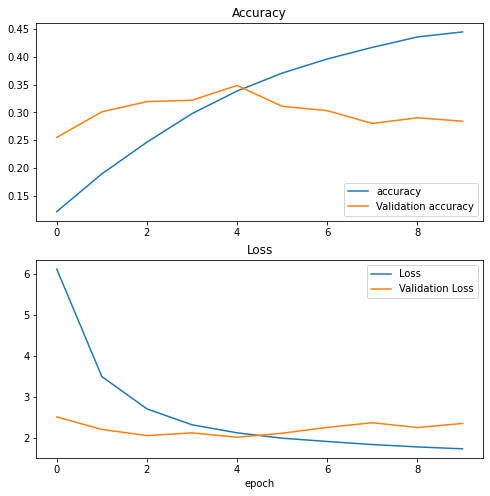

[I 2022-06-18 17:24:36,205] Trial 1 finished with value: 0.23758350312709808 and parameters: {'filters_l1': 26, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.4900877066589152, 'filters_l2': 62, 'kernel_size_l2': 3, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'elu', 'dropout_l2': 0.29772338293799905, 'filters_l3': 19, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3005257633311678, 'n_units_l': 48, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.441757365836565, 'learning_rate': 6.671927535398284e-05, 'beta_1': 0.9970681927287518, 'beta_2': 0.9903653456613065, 'epsilon': 3.64499905855466e-08}. Best is trial 1 with value: 0.23758350312709808.


Loss=1.8853257894515991, Accuracy=0.34766191244125366 


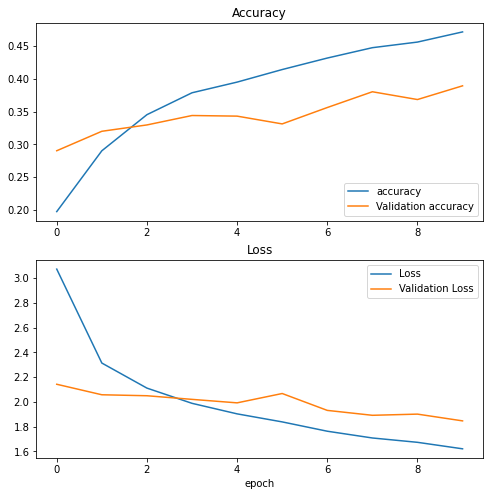

[I 2022-06-18 17:33:44,436] Trial 2 finished with value: 0.34766191244125366 and parameters: {'filters_l1': 6, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.17606966606558558, 'filters_l2': 7, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.25460332284738074, 'filters_l3': 251, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.13171406766279598, 'n_units_l': 902, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.41945613464021503, 'learning_rate': 2.307517047020593e-05, 'beta_1': 0.9559475281069865, 'beta_2': 0.9073925122001624, 'epsilon': 8.886189820489698e-07}. Best is trial 2 with value: 0.34766191244125366.


Loss=2.37309193611145, Accuracy=0.1536450833082199 


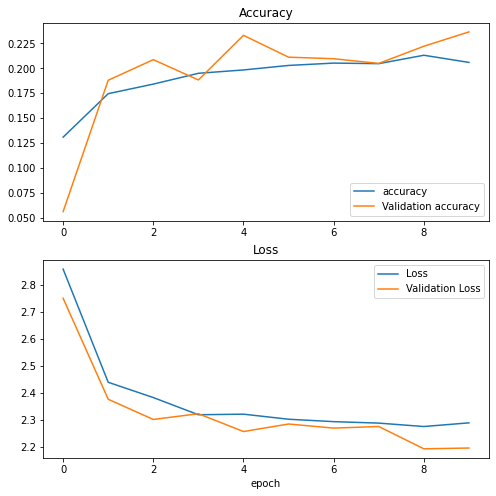

[I 2022-06-18 17:42:44,444] Trial 3 finished with value: 0.1536450833082199 and parameters: {'filters_l1': 5, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'linear', 'dropout_l1': 0.3233422420899027, 'filters_l2': 15, 'kernel_size_l2': 3, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.23542730940265166, 'filters_l3': 8, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.2660944198957343, 'n_units_l': 121, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.43145224497381285, 'learning_rate': 0.009612170188218437, 'beta_1': 0.9721834172849418, 'beta_2': 0.9786575647727488, 'epsilon': 2.0275664722574633e-07}. Best is trial 2 with value: 0.34766191244125366.


Loss=2.7986905574798584, Accuracy=0.05808887630701065 


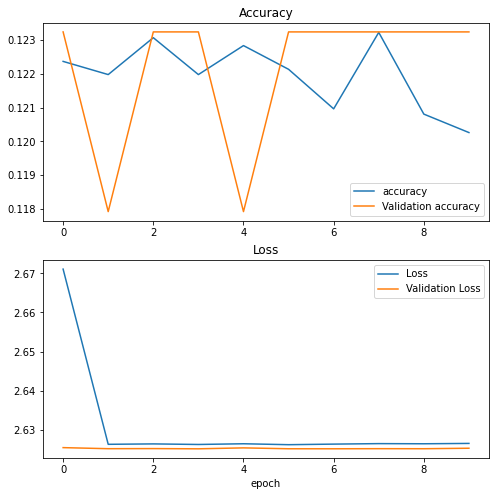

[I 2022-06-18 17:52:02,833] Trial 4 finished with value: 0.05808887630701065 and parameters: {'filters_l1': 9, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.34771662663034136, 'filters_l2': 27, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'elu', 'dropout_l2': 0.24801730447861625, 'filters_l3': 50, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.37629799820128673, 'n_units_l': 8, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.1748659649100785, 'learning_rate': 0.004129821950716883, 'beta_1': 0.9650046324170489, 'beta_2': 0.9558973232693125, 'epsilon': 1.2433346863967377e-08}. Best is trial 2 with value: 0.34766191244125366.


Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping
Loss=2.8166112899780273, Accuracy=0.05808887630701065 


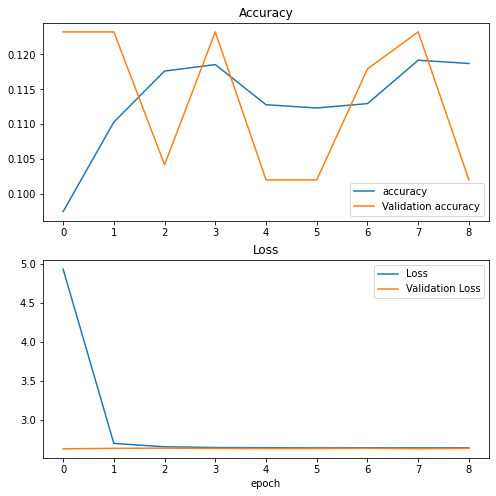

[I 2022-06-18 18:00:21,141] Trial 5 finished with value: 0.05808887630701065 and parameters: {'filters_l1': 22, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.49682053083073563, 'filters_l2': 68, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'linear', 'dropout_l2': 0.4882632591549927, 'filters_l3': 73, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.15370962646536626, 'n_units_l': 20, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.26408708301713874, 'learning_rate': 0.004122934775467601, 'beta_1': 0.9789705894460172, 'beta_2': 0.988769130302542, 'epsilon': 6.666265242014208e-07}. Best is trial 2 with value: 0.34766191244125366.


Loss=2.8110013008117676, Accuracy=0.05808887630701065 


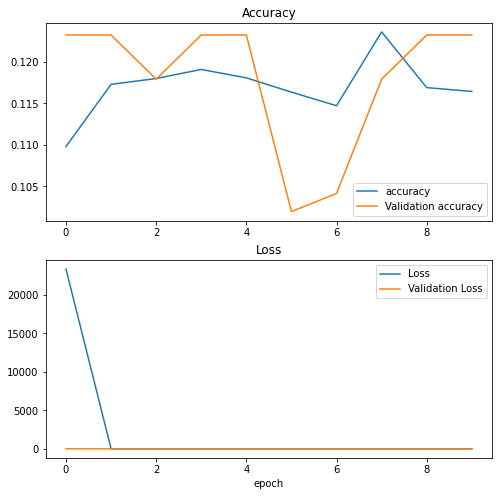

[I 2022-06-18 18:10:13,445] Trial 6 finished with value: 0.05808887630701065 and parameters: {'filters_l1': 46, 'kernel_size_l1': 7, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.10705830444751557, 'filters_l2': 84, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.39189946760701255, 'filters_l3': 42, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.1525533802708301, 'n_units_l': 66, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.1786042240534927, 'learning_rate': 0.08486752424072294, 'beta_1': 0.9382959791643896, 'beta_2': 0.9130541541175187, 'epsilon': 1.3267559664348468e-08}. Best is trial 2 with value: 0.34766191244125366.


Loss=2.2777395248413086, Accuracy=0.25442928075790405 


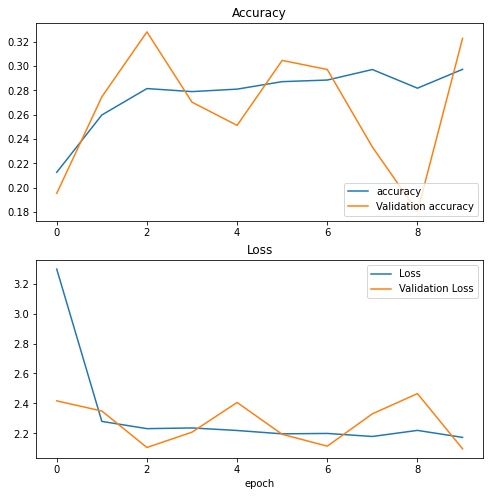

[I 2022-06-18 18:19:36,034] Trial 7 finished with value: 0.25442928075790405 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.49221412808466314, 'filters_l2': 5, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.35214818763205036, 'filters_l3': 5, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'same', 'activation_l3': 'linear', 'dropout_l3': 0.34331924292707694, 'n_units_l': 375, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.12090794559417968, 'learning_rate': 0.008821432012680309, 'beta_1': 0.9116239199527322, 'beta_2': 0.9656112141941292, 'epsilon': 1.6875740230726126e-07}. Best is trial 2 with value: 0.34766191244125366.


Loss=2.801335096359253, Accuracy=0.05808887630701065 


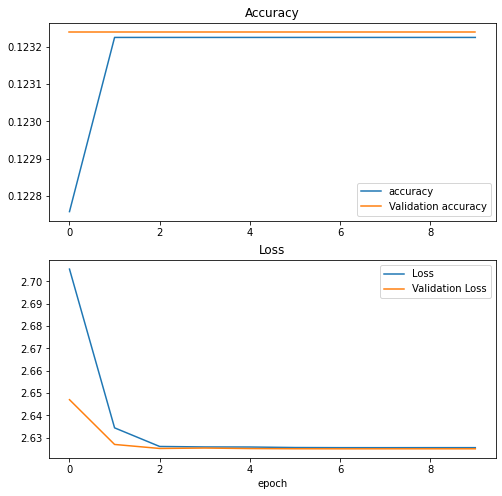

[I 2022-06-18 18:29:00,387] Trial 8 finished with value: 0.05808887630701065 and parameters: {'filters_l1': 20, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.37862537670175844, 'filters_l2': 84, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.4560638253424144, 'filters_l3': 230, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.19157389890539786, 'n_units_l': 20, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.4371376386827508, 'learning_rate': 0.0010609387941188913, 'beta_1': 0.9970114466795743, 'beta_2': 0.9059455733306312, 'epsilon': 8.478756208188944e-08}. Best is trial 2 with value: 0.34766191244125366.


Loss=2.8180246353149414, Accuracy=0.05808887630701065 


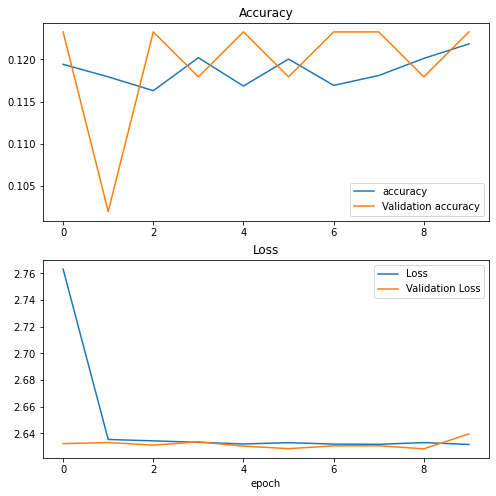

[I 2022-06-18 18:38:21,556] Trial 9 finished with value: 0.05808887630701065 and parameters: {'filters_l1': 6, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.3395868140893564, 'filters_l2': 32, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.17638789892086223, 'filters_l3': 11, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.4870350202595851, 'n_units_l': 145, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.255318136249681, 'learning_rate': 0.007719630529305755, 'beta_1': 0.9239136588950306, 'beta_2': 0.9443602611814504, 'epsilon': 5.391605784506612e-07}. Best is trial 2 with value: 0.34766191244125366.


Loss=1.7956069707870483, Accuracy=0.3825152516365051 


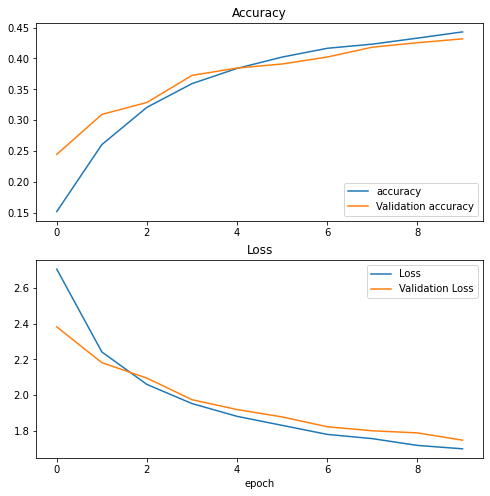

[I 2022-06-18 18:48:09,804] Trial 10 finished with value: 0.3825152516365051 and parameters: {'filters_l1': 179, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.17118658749102617, 'filters_l2': 4, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.10280433785460363, 'filters_l3': 236, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.22934053181258007, 'n_units_l': 799, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.34373198806336286, 'learning_rate': 1.1823268172988753e-05, 'beta_1': 0.9489088648019027, 'beta_2': 0.9320944594048666, 'epsilon': 8.791925394129187e-07}. Best is trial 10 with value: 0.3825152516365051.


Loss=1.7820829153060913, Accuracy=0.379901260137558 


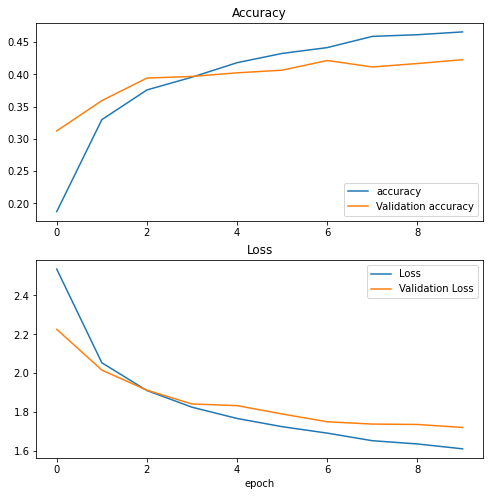

[I 2022-06-18 18:58:01,724] Trial 11 finished with value: 0.379901260137558 and parameters: {'filters_l1': 207, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.1495679959377358, 'filters_l2': 4, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.12883824590467033, 'filters_l3': 252, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.10446526412722111, 'n_units_l': 1014, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.35323998469951917, 'learning_rate': 1.2417461196541963e-05, 'beta_1': 0.9481623991831574, 'beta_2': 0.9292648318491977, 'epsilon': 7.535689914413254e-07}. Best is trial 10 with value: 0.3825152516365051.


Loss=1.8645623922348022, Accuracy=0.3581179082393646 


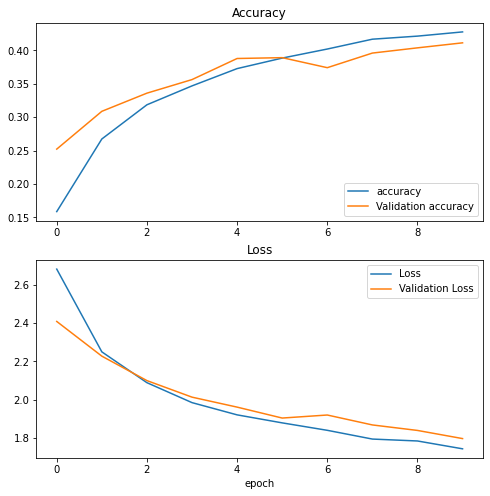

[I 2022-06-18 19:07:59,574] Trial 12 finished with value: 0.3581179082393646 and parameters: {'filters_l1': 241, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.20992682023318765, 'filters_l2': 4, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.10624428870855859, 'filters_l3': 114, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.21565919752491153, 'n_units_l': 1002, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.35960265145954523, 'learning_rate': 1.6180036614718284e-05, 'beta_1': 0.9401721806182992, 'beta_2': 0.9329400724360685, 'epsilon': 3.5855580964437904e-07}. Best is trial 10 with value: 0.3825152516365051.


Loss=1.3397448062896729, Accuracy=0.5553296804428101 


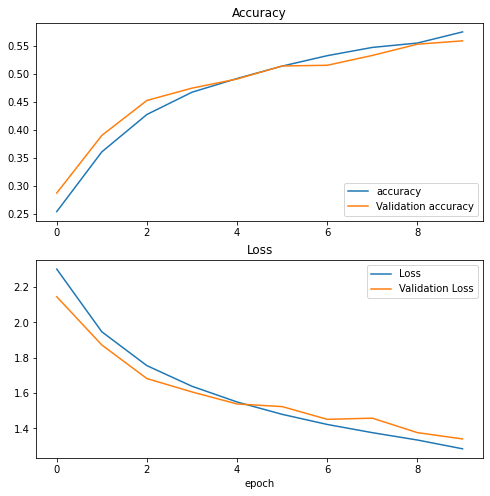

[I 2022-06-18 19:17:58,229] Trial 13 finished with value: 0.5553296804428101 and parameters: {'filters_l1': 233, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.22908310181041824, 'filters_l2': 9, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.10424250036444896, 'filters_l3': 123, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.23886800521908427, 'n_units_l': 355, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.3395566768336607, 'learning_rate': 9.375006133308395e-05, 'beta_1': 0.9455052052972543, 'beta_2': 0.9290748343120054, 'epsilon': 3.1240662694449475e-07}. Best is trial 13 with value: 0.5553296804428101.


Loss=1.2904173135757446, Accuracy=0.5602672100067139 


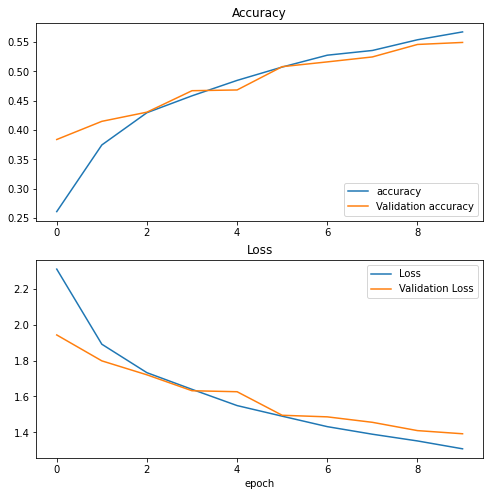

[I 2022-06-18 19:27:21,067] Trial 14 finished with value: 0.5602672100067139 and parameters: {'filters_l1': 106, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.24453455449602673, 'filters_l2': 10, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.1640930594633401, 'filters_l3': 110, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.24691596158252635, 'n_units_l': 331, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.34323600747664507, 'learning_rate': 0.00011001181357377211, 'beta_1': 0.9009021233113202, 'beta_2': 0.9318652787712349, 'epsilon': 2.558998631420729e-07}. Best is trial 14 with value: 0.5602672100067139.


Loss=1.5255441665649414, Accuracy=0.47516700625419617 


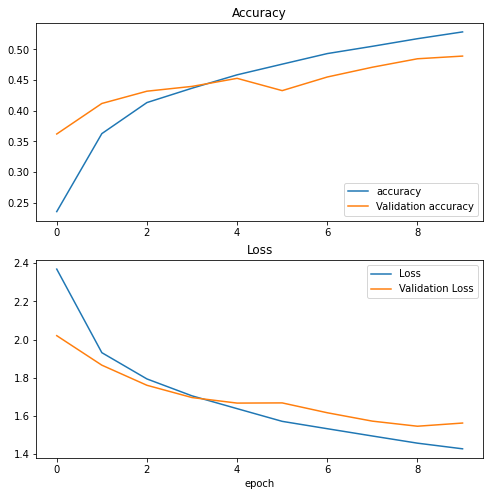

[I 2022-06-18 19:37:11,758] Trial 15 finished with value: 0.47516700625419617 and parameters: {'filters_l1': 96, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.2723080995649207, 'filters_l2': 10, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.16894942628139475, 'filters_l3': 114, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.2879497566613567, 'n_units_l': 315, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.48913787008446685, 'learning_rate': 0.00012099856399128745, 'beta_1': 0.9003743276248368, 'beta_2': 0.946285029745164, 'epsilon': 8.131155182139885e-08}. Best is trial 14 with value: 0.5602672100067139.


Loss=1.2287741899490356, Accuracy=0.6049956679344177 


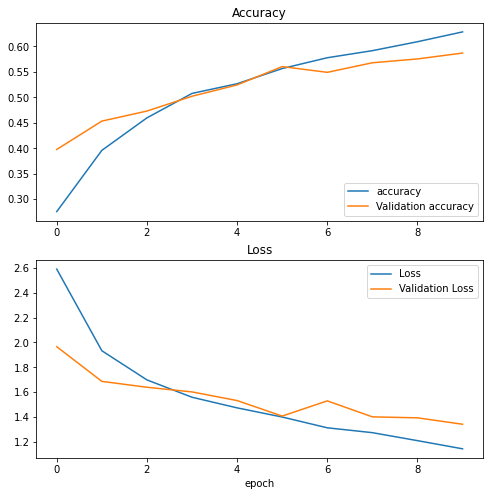

[I 2022-06-18 19:47:01,658] Trial 16 finished with value: 0.6049956679344177 and parameters: {'filters_l1': 97, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.24271479606883098, 'filters_l2': 15, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.1824172279938257, 'filters_l3': 105, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.25299993228641104, 'n_units_l': 327, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.3203211298037331, 'learning_rate': 0.0002619292117959799, 'beta_1': 0.9288018141757841, 'beta_2': 0.9229777843943373, 'epsilon': 2.7843175160974523e-07}. Best is trial 16 with value: 0.6049956679344177.


Loss=1.3274166584014893, Accuracy=0.561428964138031 


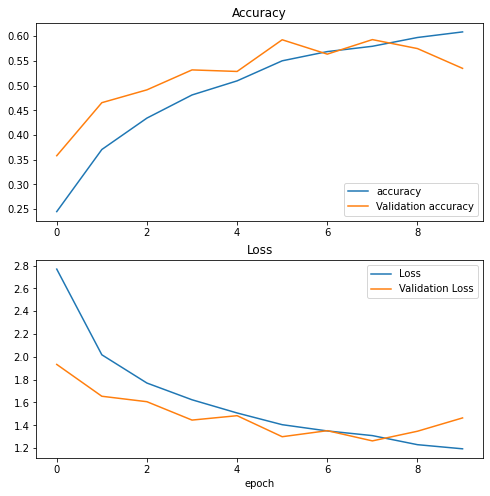

[I 2022-06-18 19:56:23,579] Trial 17 finished with value: 0.561428964138031 and parameters: {'filters_l1': 95, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.2597744436019243, 'filters_l2': 26, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.1880560108243357, 'filters_l3': 74, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.31937877249489777, 'n_units_l': 136, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.31036449496430557, 'learning_rate': 0.00032921694393521955, 'beta_1': 0.9008154568892308, 'beta_2': 0.9200617418944177, 'epsilon': 1.4947837681851348e-07}. Best is trial 16 with value: 0.6049956679344177.


Loss=1.7942962646484375, Accuracy=0.44408944249153137 


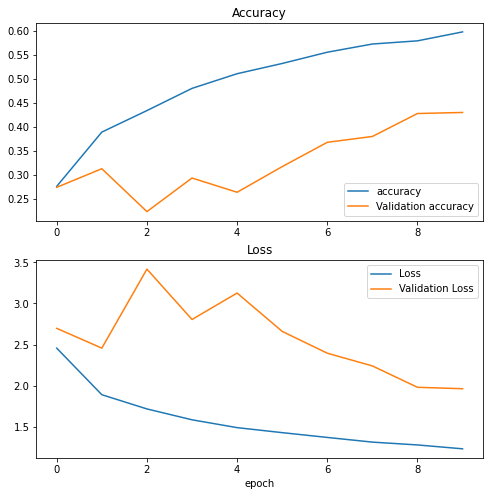

[I 2022-06-18 20:05:32,435] Trial 18 finished with value: 0.44408944249153137 and parameters: {'filters_l1': 77, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.3959043759584793, 'filters_l2': 22, 'kernel_size_l2': 3, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.2181764936890132, 'filters_l3': 62, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3537143898513198, 'n_units_l': 158, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.21284781827834057, 'learning_rate': 0.00046806296310588025, 'beta_1': 0.9298088855837322, 'beta_2': 0.9162835028927623, 'epsilon': 1.2089810300334242e-07}. Best is trial 16 with value: 0.6049956679344177.


Loss=1.5463104248046875, Accuracy=0.48997965455055237 


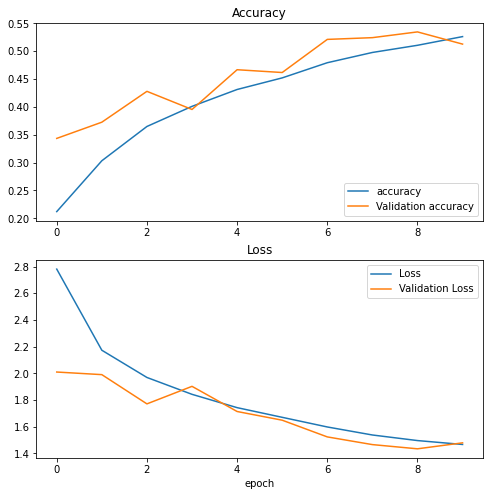

[I 2022-06-18 20:14:45,499] Trial 19 finished with value: 0.48997965455055237 and parameters: {'filters_l1': 55, 'kernel_size_l1': 7, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'linear', 'dropout_l1': 0.27657425404851527, 'filters_l2': 40, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.20134717950934167, 'filters_l3': 22, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3134058148509039, 'n_units_l': 66, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.2906292722008935, 'learning_rate': 0.00034840553554160383, 'beta_1': 0.910339567907759, 'beta_2': 0.9227825413632659, 'epsilon': 4.5360805422052456e-08}. Best is trial 16 with value: 0.6049956679344177.


Loss=1.844077706336975, Accuracy=0.32820215821266174 


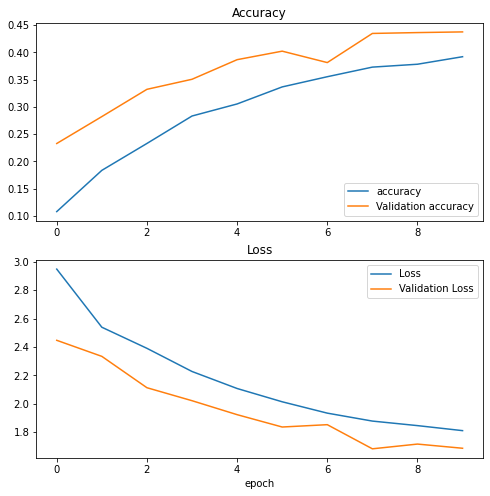

[I 2022-06-18 20:24:16,162] Trial 20 finished with value: 0.32820215821266174 and parameters: {'filters_l1': 141, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.43972948308655524, 'filters_l2': 16, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.2902466047255997, 'filters_l3': 78, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.40232499372685526, 'n_units_l': 4, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.23062858853297175, 'learning_rate': 0.00029393269824773275, 'beta_1': 0.9286851556182435, 'beta_2': 0.9019954041339391, 'epsilon': 5.517345358573873e-08}. Best is trial 16 with value: 0.6049956679344177.


Loss=2.226945638656616, Accuracy=0.32820215821266174 


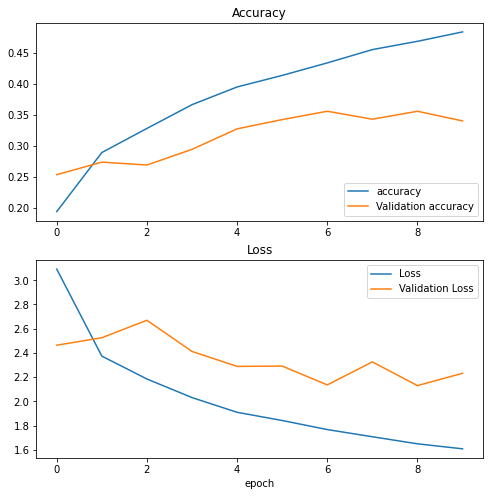

[I 2022-06-18 20:33:41,021] Trial 21 finished with value: 0.32820215821266174 and parameters: {'filters_l1': 111, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.2530239135529697, 'filters_l2': 15, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.15405299991853977, 'filters_l3': 129, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.2578022171555052, 'n_units_l': 230, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.30977181532741066, 'learning_rate': 4.505470350065884e-05, 'beta_1': 0.9018289334191089, 'beta_2': 0.9364402267170678, 'epsilon': 2.850869238051683e-07}. Best is trial 16 with value: 0.6049956679344177.


Loss=1.6670644283294678, Accuracy=0.45425501465797424 


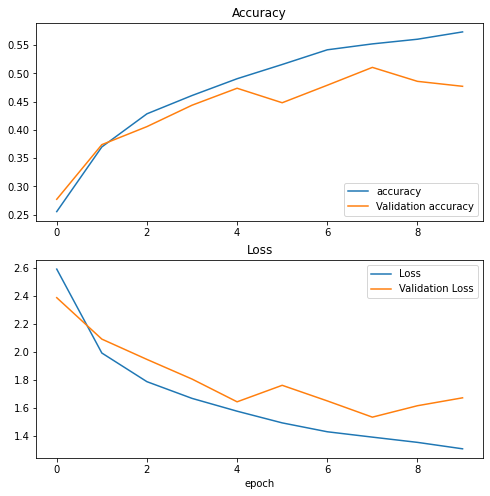

[I 2022-06-18 20:43:31,427] Trial 22 finished with value: 0.45425501465797424 and parameters: {'filters_l1': 61, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.21984012240281378, 'filters_l2': 11, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.19361997761832592, 'filters_l3': 90, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.18701175209812185, 'n_units_l': 501, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.377372644618049, 'learning_rate': 0.00015020468409588286, 'beta_1': 0.9102252782839569, 'beta_2': 0.9194899317492293, 'epsilon': 1.554210130448416e-07}. Best is trial 16 with value: 0.6049956679344177.


Loss=1.0661683082580566, Accuracy=0.6659889817237854 


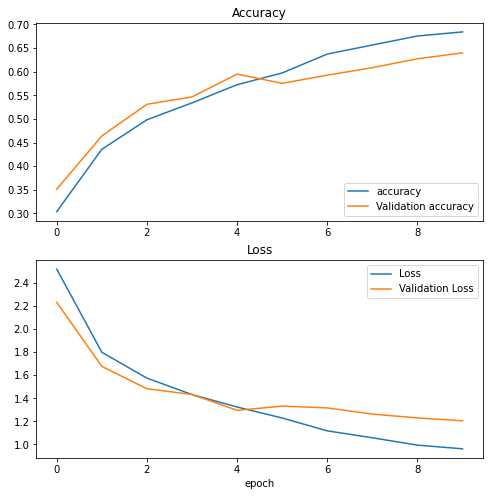

[I 2022-06-18 20:52:41,748] Trial 23 finished with value: 0.6659889817237854 and parameters: {'filters_l1': 37, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.28405073766390143, 'filters_l2': 21, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.1437598791542924, 'filters_l3': 152, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3146723804796031, 'n_units_l': 98, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.30807312630357786, 'learning_rate': 0.0012558004561947142, 'beta_1': 0.9172795074408215, 'beta_2': 0.9408941326921156, 'epsilon': 4.210159946934538e-07}. Best is trial 23 with value: 0.6659889817237854.


Loss=0.9728017449378967, Accuracy=0.7060703039169312 


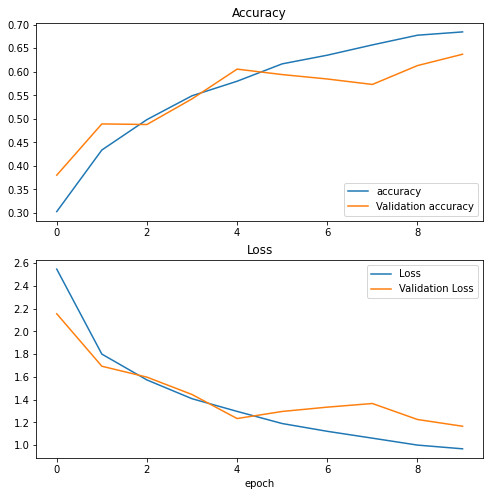

[I 2022-06-18 21:01:55,571] Trial 24 finished with value: 0.7060703039169312 and parameters: {'filters_l1': 34, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.2977010246091844, 'filters_l2': 46, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.14770068039377388, 'filters_l3': 146, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3326744973391214, 'n_units_l': 96, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.30319603996846656, 'learning_rate': 0.0012693569327443483, 'beta_1': 0.9201827142678152, 'beta_2': 0.9506725497362581, 'epsilon': 3.9701172698163563e-07}. Best is trial 24 with value: 0.7060703039169312.


Loss=0.9317115545272827, Accuracy=0.711007833480835 


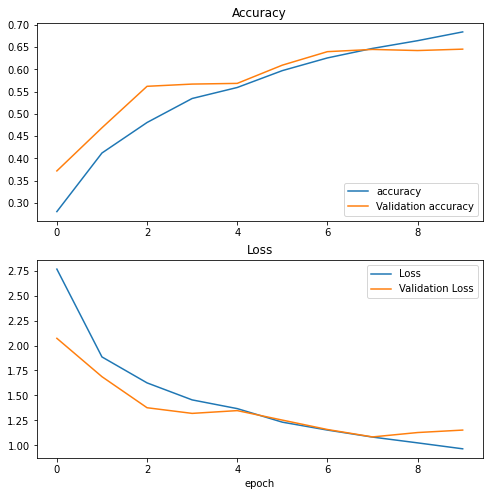

[I 2022-06-18 21:11:13,131] Trial 25 finished with value: 0.711007833480835 and parameters: {'filters_l1': 37, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.30291578762264126, 'filters_l2': 39, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.14860482526511973, 'filters_l3': 169, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.38803955612510616, 'n_units_l': 48, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.3865223386717763, 'learning_rate': 0.0013845795980066019, 'beta_1': 0.9215135584452248, 'beta_2': 0.9580284898472299, 'epsilon': 4.5793309307680743e-07}. Best is trial 25 with value: 0.711007833480835.


Loss=1.1802281141281128, Accuracy=0.7066511511802673 


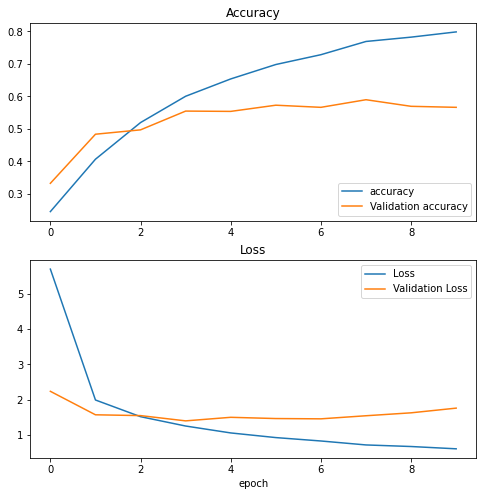

[I 2022-06-18 21:21:12,335] Trial 26 finished with value: 0.7066511511802673 and parameters: {'filters_l1': 38, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.2991773546178217, 'filters_l2': 48, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.14067196150475791, 'filters_l3': 170, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.4483836717494361, 'n_units_l': 41, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.3904259100724225, 'learning_rate': 0.0013433223773509273, 'beta_1': 0.9209017172006473, 'beta_2': 0.9596401542071918, 'epsilon': 4.428136878851556e-07}. Best is trial 25 with value: 0.711007833480835.


Loss=1.3253824710845947, Accuracy=0.5884402990341187 


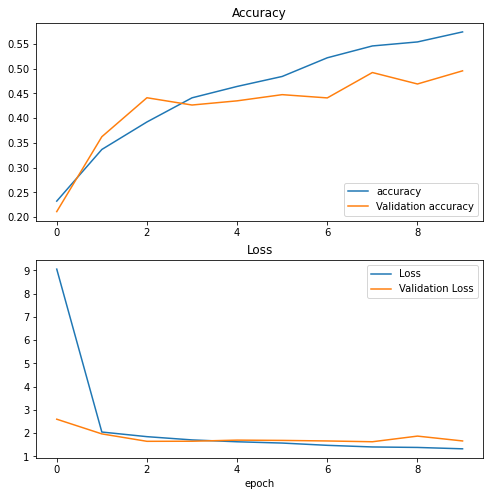

[I 2022-06-18 21:31:10,533] Trial 27 finished with value: 0.5884402990341187 and parameters: {'filters_l1': 15, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.31532323588601047, 'filters_l2': 43, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.13676433105715485, 'filters_l3': 177, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.4529237078022012, 'n_units_l': 35, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.3867875996254893, 'learning_rate': 0.003510580123750536, 'beta_1': 0.9340463828891333, 'beta_2': 0.9561486158651216, 'epsilon': 4.891651147692811e-07}. Best is trial 25 with value: 0.711007833480835.


In [ ]:
from tensorflow.keras.models import Model
from keras.layers import Conv2D, BatchNormalization, ReLU, Activation
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Input
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam


model = Sequential()
model.add(Input(shape=(IMAGE_SHAPE)))
model.add(BatchNormalization())


model.add(Conv2D(filters=30,kernel_size=7,strides=1,padding='same',
                 kernel_initializer='he_uniform',))
model.add(Activation(activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.33))

model.add(Conv2D(filters=140,kernel_size=3,strides=1,padding='same',
                 kernel_initializer='he_uniform',))
model.add(Activation(activation='linear'))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate= 0.35))

model.add(Conv2D(filters=30,kernel_size=3,strides=2,padding='valid',
                 kernel_initializer='he_uniform',))
model.add(Activation(activation='relu'))  
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate= 0.42))
model.add(Flatten())

model.add(Dense(units=17,kernel_initializer='he_uniform',))
model.add(Activation(activation='relu'))  

model.add(Dropout(rate=0.27))
model.add(Dense(15,activation="softmax"))

# We compile our model with a sampled learning rate.
learning_rate = 0.001
beta_1 = 0.92
beta_2 = 0.92
epsilon =  1.178e-08


optimizer = Adam(learning_rate=learning_rate,
    beta_1=beta_1,
    beta_2=beta_2,
    epsilon=epsilon,
    amsgrad=False,
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"],
)



history = model.fit(
    training_set,
    validation_data = validation_set,
    shuffle=True,
    batch_size=10,
    epochs=EPOCHS,
    verbose=True,

)

score = model.evaluate(test_set, verbose=0)
print("Loss={}, Accuracy={} ".format(score[0], score[1]))
plot_history(history)
plt.show()

